In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("C:/msys64/home/for/10th/standard/LinearBNB/2025_Airbnb_NYC_listings.csv", encoding = 'utf-8')
print(df.columns)

Index(['Unnamed: 0', 'id', 'source', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
     

In [13]:
df_col = ['neighbourhood_group_cleansed', 'latitude', 'longitude', 
          'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'amenities', 
          'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'instant_bookable']
        #   'number_of_reviews', 'reviews_per_month', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'first_review', 'last_review']

In [14]:
df = df.fillna(0)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
df['neighbourhood'] = df['neighbourhood_group_cleansed'].copy()

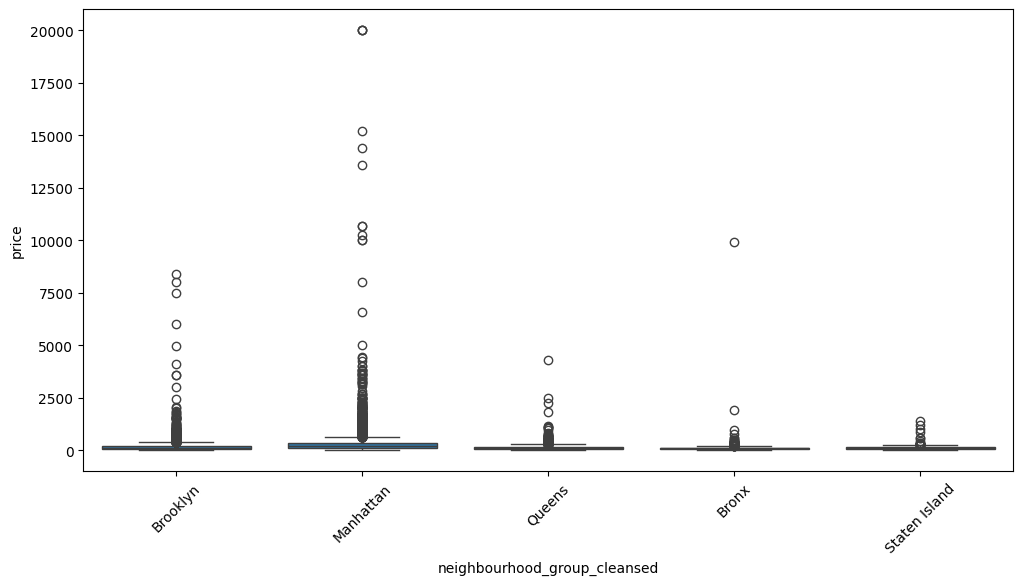

In [16]:
df.groupby('neighbourhood_group_cleansed')['price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='neighbourhood_group_cleansed', y='price')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['neighbourhood_encoding'] = df['neighbourhood_group_cleansed'].factorize()[0]
df['property_type_encoding'] = df['property_type'].factorize()[0]
df['room_type_encoding'] = df['room_type'].factorize()[0]
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

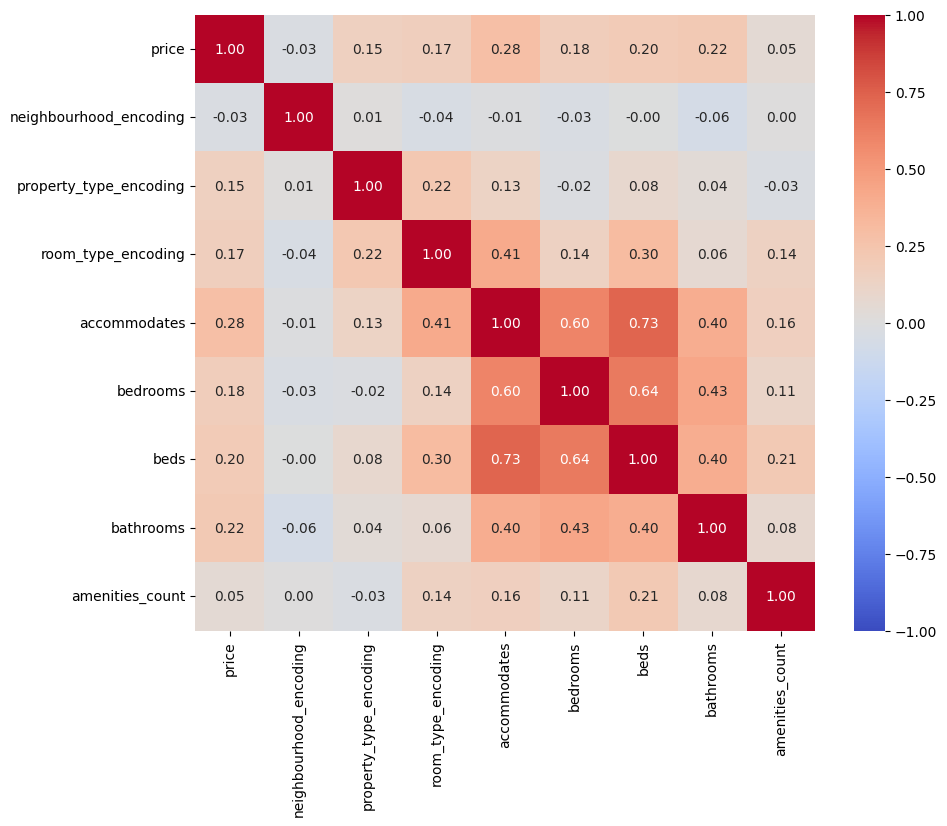

In [18]:
corr = df[['price', 'neighbourhood_encoding', 'property_type_encoding',
           'room_type_encoding', 'accommodates', 'bedrooms',
           'beds', 'bathrooms', 'amenities_count']].corr()
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.show()

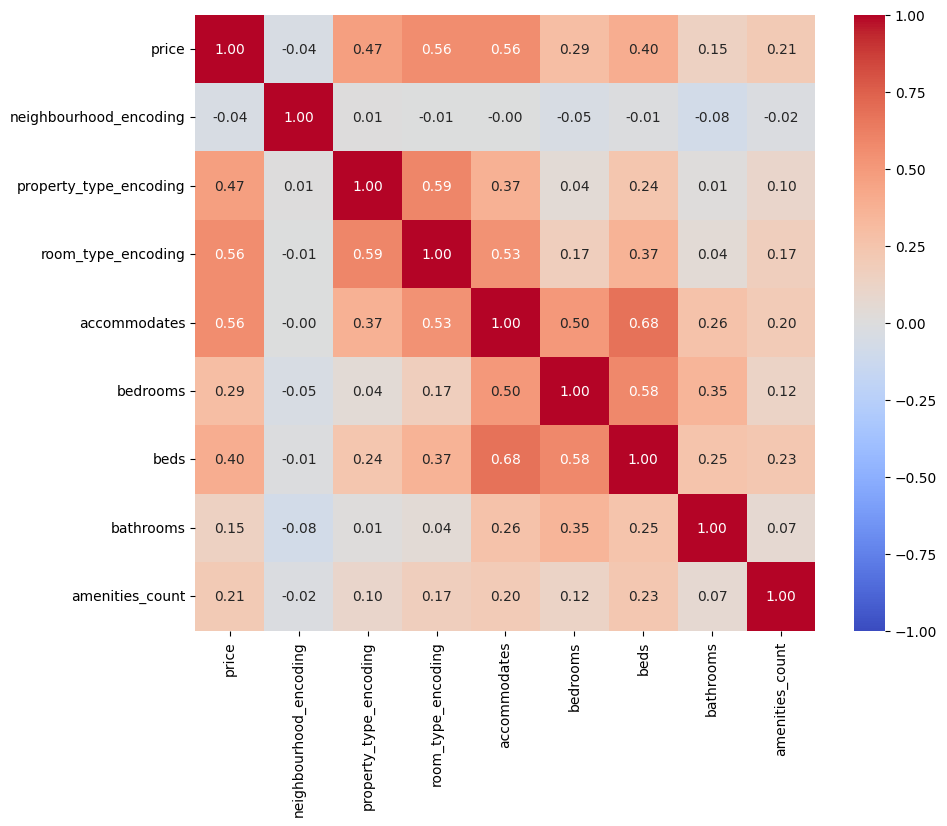

In [19]:
corr = df[['price', 'neighbourhood_encoding', 'property_type_encoding',
           'room_type_encoding', 'accommodates', 'bedrooms',
           'beds', 'bathrooms', 'amenities_count']].corr(method = 'spearman')
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.show()

In [20]:
import statsmodels.api as sm

cols = [
    "neighbourhood_encoding",
    "property_type_encoding",
    "room_type_encoding",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "amenities_count",
]

# X, y 준비
X = df[cols].copy()
y = df["price"].copy()

# (선택) 가격이 치우쳐 있으면 로그 추천
# y = np.log1p(df["price"])

# 상수항 추가
X = sm.add_constant(X)

# OLS 적합
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     351.8
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:26:00   Log-Likelihood:            -1.6547e+05
No. Observations:               22308   AIC:                         3.310e+05
Df Residuals:                   22299   BIC:                         3.310e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -83